# Data Scientist Associate Practical Exam

## Company Background
GoalZone is a fitness club chain providing five types of fitness classes in Canada. Finally, the fitness classes schedule is back to normal after the COVID-19 restrictions are lifted. However, they have received many complaints from the customers about having a hard time booking a fitness class.

From initial analysis, the program operation team found out that the fitness classes are always fully booked but are having a low attendance rate per class. To improve this situation, they would like to increase the class capacity for customers to sign up if a low attendance rate is predicted.  


## Customer Question
The operation manager has asked you to answer the following:
- Can you predict the attendance rate for each fitness class? 



## Dataset
The dataset contains the attendance information for the class scheduled this year so far. The data you will use for this analysis can be accessed here: `"data/fitness_class.csv"`

| Column Name                     | Criteria                                                                                                                                                                        |
|---------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Day of Week                     | Character, the day of the week the class was scheduled, one of values from “Mon” to “Sun”.                                                                                      |
| Time                            | Character, the time of the day the class was scheduled, either "AM" or "PM".                                                                                                        |
| Class Category                  | Character, the category of the fitness class, one of “Yoga”, “Aqua”, “Strength”, “HIIT”, or “Cycling”.                                                                          |
| Days Before                     | Numeric, number of days the class stayed fully booked, maximum five days.                                                                                                       |
| Class Capacity                  | Numeric, maximum number of members can sign up for that class, either 15 or 25.  The class capacity being 26 needs to be updated to 25.                                         |
| Attendance                      | Numeric, number of members actually attended the class.                                                                                                                         |
| Average Age                     | Numeric, average age of the members signing up for that class.  Remove rows that average age is smaller than 14 because group fitness class are for members aged 14 and order.  |
| Number of New Students          | Numeric, number of new students signing up for this class.                                                                                                                      |
| Number of Members Over 6 months | Numeric, number of members signing up for the class have been joining the club more than 6 months.                                                                              |                                                                                     |

# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


In [235]:
# Data Validation
# Check all variables in the data against the criteria in the dataset above

# Start coding here... 
import pandas as pd

fitness_df = pd.read_csv('data/fitness_class.csv')
# Have a look at how the data is structured
fitness_df.head()

,day_of_week,time,class_category,class_capacity,days_before,attendance,age,new_students,over_6_month
0,Wed,AM,Yoga,15,1,8,31.1,6,4
1,Sun,PM,Aqua,15,3,8,27.0,7,8
2,Mon,AM,Aqua,15,5,10,22.4,8,7
3,Sun,PM,Strength,25,3,18,23.5,7,9
4,Mon,AM,Yoga,15,5,10,29.8,5,7


In [236]:
# Check column "day_of_week"
fitness_df['day_of_week'].value_counts()

# Should be 7 different values, no need to change

Thu    127
Tue    120
Wed    116
Sun    115
Sat    100
Fri     95
Mon     92
Name: day_of_week, dtype: int64

In [237]:
# Check column "time"
fitness_df['time'].value_counts()

# Should be AM and PM, no need to change

PM    396
AM    369
Name: time, dtype: int64

In [238]:
# Check column "class_category"
fitness_df['class_category'].value_counts()

# Should be “Yoga”, “Aqua”, “Strength”, “HIIT”, or “Cycling”, no need to change

Yoga        175
Strength    163
Aqua        160
HIIT        137
Cycling     130
Name: class_category, dtype: int64

In [239]:
# Check column "class_capacity"
fitness_df['class_capacity'].value_counts()

# Should be 15 or 25, some values are 26, they should be changed to 25

15    571
25    189
26      5
Name: class_capacity, dtype: int64

In [240]:
# Update 26 to 25 in class_capacity column
fitness_df['class_capacity'] = fitness_df['class_capacity'].replace(26,25)

# Check again
fitness_df['class_capacity'].value_counts()

# Now we successfully changed 26 to 25

15    571
25    194
Name: class_capacity, dtype: int64

In [241]:
# Check column "days_before"
fitness_df['days_before'].value_counts()

# The maximum is 5, so no need to change

1    244
4    156
2    152
3    144
5     69
Name: days_before, dtype: int64

In [242]:
# Check column "attendance"
fitness_df['attendance'].value_counts()

# All entries are numeric, so no need to change

11    88
8     87
9     81
6     74
7     72
12    71
5     69
10    68
4     39
16    17
14    16
20    15
15    14
19    13
13    12
18    12
17    10
21     7
Name: attendance, dtype: int64

In [243]:
# Check column "age"
fitness_df['age'].value_counts().sort_index()

# We should delete the row whose age is under 14

8.3     1
11.3    1
13.6    1
14.0    1
14.3    1
       ..
44.3    1
45.0    1
46.5    1
48.3    1
48.8    1
Name: age, Length: 234, dtype: int64

In [244]:
fitness_df = fitness_df.drop(index = fitness_df[fitness_df['age'] < 14].index)

In [245]:
# Check again
fitness_df['age'].value_counts().sort_index()

# Now it works!

14.0    1
14.3    1
14.8    1
15.1    1
15.3    1
       ..
44.3    1
45.0    1
46.5    1
48.3    1
48.8    1
Name: age, Length: 231, dtype: int64

In [246]:
# Check column "new_students"
fitness_df['new_students'].value_counts()

# All entries are numeric, so no need to change

6     177
5     154
7     128
4      93
8      85
3      49
9      39
2      15
10     15
11      4
1       3
Name: new_students, dtype: int64

In [247]:
# Check column "over_6_month"
fitness_df['over_6_month'].value_counts()

# All entries are numeric, so no need to change
# With this, all columns are checked and ready for analysis, so the data validation is over

7     158
8     150
6     112
9     100
10     78
5      58
4      42
11     39
12     13
3       7
13      3
2       2
Name: over_6_month, dtype: int64

In [248]:
# Finally, we check if there is missing value in the dataframe
fitness_df.isna().sum().sort_values()

# Turns out there's no missing value, perfect!

day_of_week       0
time              0
class_category    0
class_capacity    0
days_before       0
attendance        0
age               0
new_students      0
over_6_month      0
dtype: int64

## Data Validation
Describe the validation tasks you completed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data. 

In processing this csv file, I did the following processes with pandas:

1. I use read_csv in pandas to change the dataset to dataframe.
2. For every column in the dataframe, I checked the values to make sure they match the need:

	i) Change 26 to 25 in 'class_capacity' column.
    
    ii) Delete the rows where 'age' is lower than 14.
    
    iii) Check all the other cloumns and all of them match the need.
    
    
3. Check that there is no missing value in the dataframe.

With this, the data cleaning step is over and the data is now ready-to-use.

In [249]:
# Exploratory Analysis
# Explore the characteristics of the variables in the data

# Start coding here... 
fitness_df

,day_of_week,time,class_category,class_capacity,days_before,attendance,age,new_students,over_6_month
0,Wed,AM,Yoga,15,1,8,31.1,6,4
1,Sun,PM,Aqua,15,3,8,27.0,7,8
2,Mon,AM,Aqua,15,5,10,22.4,8,7
3,Sun,PM,Strength,25,3,18,23.5,7,9
4,Mon,AM,Yoga,15,5,10,29.8,5,7
...,...,...,...,...,...,...,...,...,...
760,Sat,AM,Aqua,15,1,4,38.5,5,6
761,Sat,PM,Aqua,15,1,4,41.2,6,3
762,Sun,AM,Cycling,15,4,12,26.1,8,9
763,Sun,PM,Strength,15,1,7,33.3,5,7


Text(0.5, 1.0, 'Distribution of class categories')

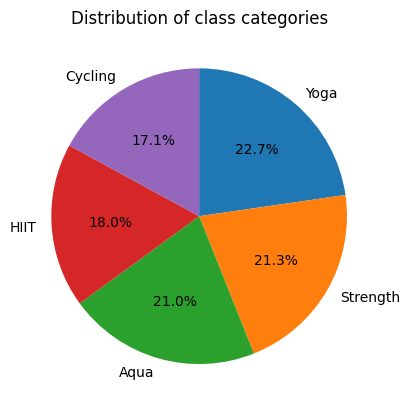

In [250]:
# Show the proportion of classes with maximum 15 people and 25 people
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sorted_counts = fitness_df['class_category'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%1.1f%%')
plt.title('Distribution of class categories')

We can see from the figure that each class is distributed nearly equally, with the highest 22.7% (Yoga) and lowest 17.1% (Cycling).

Text(0.5, 1.0, 'Distribution of day of week')

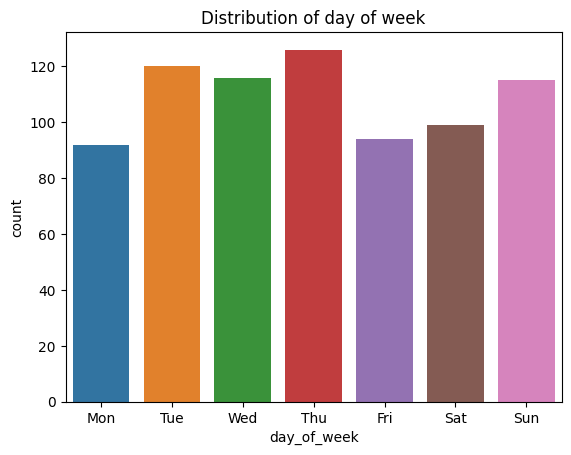

In [251]:
# Show the distribution of days of a week for all courses
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax = sns.countplot(x='day_of_week', data=fitness_df, order=order)
plt.title('Distribution of day of week')

Intersting is, there are the most classes on Tuesday, Wednsday and Thursday and less on Monday and Friday.

Maximum: 0.84
Minimum: 0.26666666666666666
Average: 0.5421522309711286


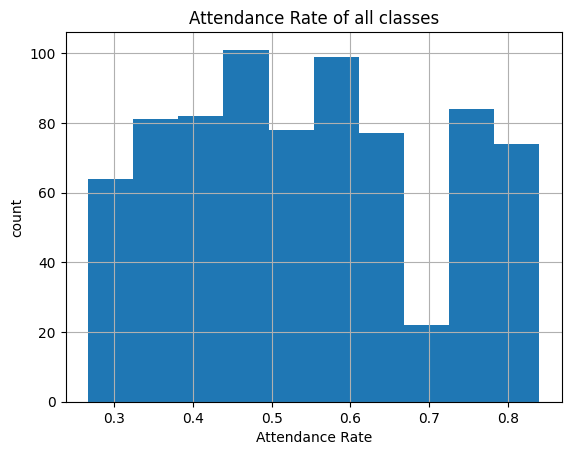

In [252]:
# Also, we would like to see the attendence rate distribution, we add a column to dataframe
fitness_df['attendance_rate'] = fitness_df['attendance'] / fitness_df['class_capacity']
fitness_df['attendance_rate'].hist()
plt.title('Attendance Rate of all classes')
plt.xlabel('Attendance Rate')
plt.ylabel('count')
print('Maximum:', fitness_df['attendance_rate'].max())
print('Minimum:', fitness_df['attendance_rate'].min())
print('Average:', fitness_df['attendance_rate'].mean())

We see the maximum attendence rate is 0.84 and lowest is 0.27 (quite low, only 1 out of 4 people came)

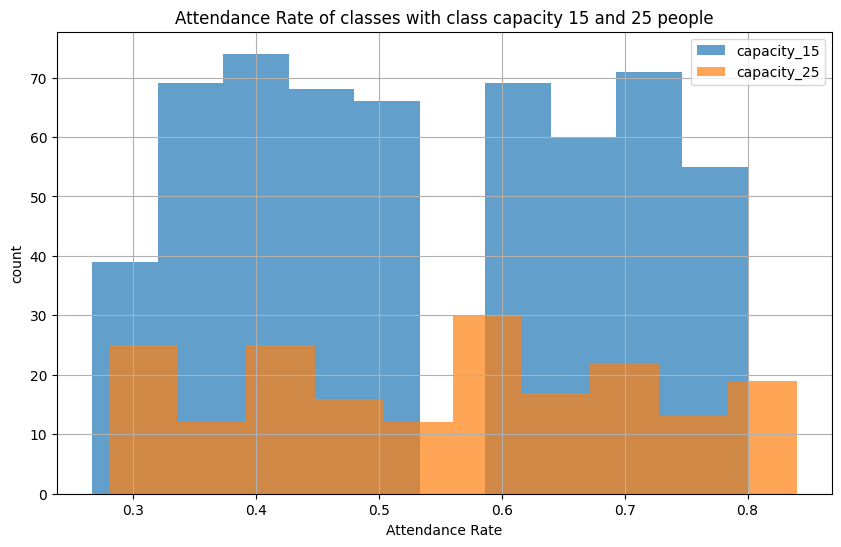

Capacity_15_Average: 0.5383537653239929
Capacity_25_Average: 0.5535078534031413


In [253]:
# It would be also interesting to see the comparison of attendence rate for different class capacities
df_capacity_15 = fitness_df[fitness_df['class_capacity'] == 15]
df_capacity_25 = fitness_df[fitness_df['class_capacity'] == 25]

df_capacity_15['attendance_rate'].hist(alpha = 0.7, figsize=(10, 6))
df_capacity_25['attendance_rate'].hist(alpha = 0.7)
plt.legend(['capacity_15','capacity_25'], loc = 1)
plt.title('Attendance Rate of classes with class capacity 15 and 25 people')
plt.xlabel('Attendance Rate')
plt.ylabel('count')
plt.show()

print('Capacity_15_Average:', df_capacity_15['attendance_rate'].mean())
print('Capacity_25_Average:', df_capacity_25['attendance_rate'].mean())

From the maximum, minimum and average, we can see classes with capacity of 25 people have slightly higher attendence rate. From the histogram, the advantage is not obvious.

With these visualizations in mind, we can start with the models.

## Exploratory Analysis
Describe what you found in the exploratory analysis. In your description you should:
- Reference at least two different data visualizations you created above to demonstrate the characteristics of single variables
- Reference at least one data visualization you created above to demonstrate the relationship between two or more variables
- Describe what your exploratory analysis has told you about the data
- Describe any changes you have made to the data to enable modeling

The visualization and the description can be seen above. To enable modeling, I added a column called "attendance_rate", which is also specified above.

In [254]:
# Model Fitting
# Choose and fit a baseline model
# Choose and fit a comparison model

# Start coding here... 
# Prepare the dummy dataframe (process categorical entries)
fitness_dummies = pd.get_dummies(fitness_df, drop_first = True)

# Prepare the training and test set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Copied from the first part
X = fitness_dummies.drop(["attendance", "attendance_rate"], axis=1).values
y = fitness_dummies["attendance_rate"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [255]:
# We start with the baseline model, Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

# Instantiate a lasso regression model
lasso = Lasso()

# Create a KFold object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train_scaled, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 1e-05}
Tuned lasso score: 0.5893764910085921


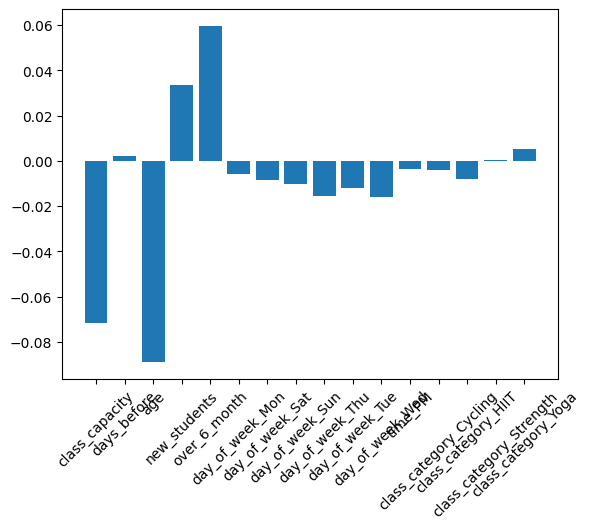

In [256]:
# Have a look at the coefficients of lasso model
names = fitness_dummies.drop(["attendance", "attendance_rate"], axis=1).columns
lasso = Lasso(alpha=1e-5)
lasso_coef = lasso.fit(X_train_scaled, y_train).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

Interesting! We see a relatively strong relationship in class_capacity, age (both negative) and also number of new students and number of members over 6 months.

In [257]:
# Next, we do the same to comparison model
# The data we use is the same, so no need to do it again
from sklearn.linear_model import Ridge

# Instantiate a ridge regression model
ridge = Ridge()

# The kf is the same
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Set up the parameter grid, also the same
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)

# Fit to the training data
ridge_cv.fit(X_train_scaled, y_train)
print("Tuned lasso paramaters: {}".format(ridge_cv.best_params_))
print("Tuned lasso score: {}".format(ridge_cv.best_score_))

Tuned lasso paramaters: {'alpha': 1.0}
Tuned lasso score: 0.5894431511297312


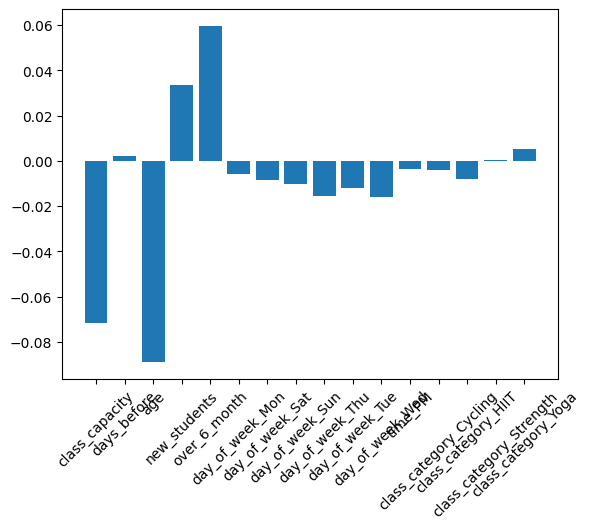

In [258]:
# Have a look at the coefficients of ridge model
names = fitness_dummies.drop(["attendance", "attendance_rate"], axis=1).columns
ridge = Ridge(alpha=1)
ridge_coef = ridge.fit(X_train_scaled, y_train).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

From the score and the figure, we can see ridge has performed nearly the same as lasso!

## Model Fitting
Describe your approach to the model fitting. In your description you should:
- Describe what type of machine learning problem you are working on
- Describe which method you selected for the baseline model and explain why you chose this model
- Describe which method you selected for the comparison model and explain why you chose this model

Since the task is to predict attendence rate, which is a continuous value, we use regression model to solve the problem.

For regression task, there are three models to choose: Linear regression, linear regression with L1 regularization (Lasso) and linear regression with L2 regularization (Ridge). In this task, we use all the columns except "attendence" (that's what we want to predict) as input, and we can tell some of the features are more relevant than others (for example, day of week, class category and so on might be more relevant). Therefore, we would like to introduce regularization to avoid overfitting.

As stated before, we would like to focus on the most important features. Hence, we use Lasso regression as the baseline model as it can schrink the coefficients of less important features to zero. Also, we use Ridge regression as the comparison model to see the difference.


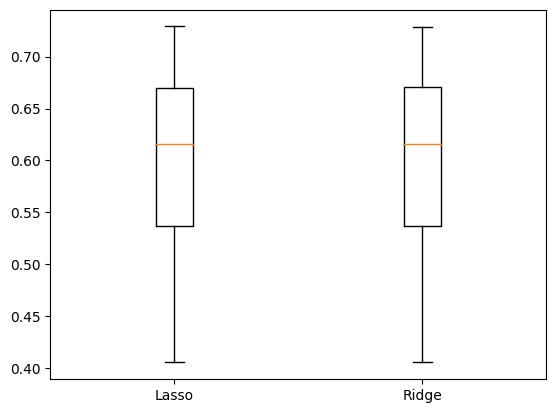

In [259]:
# Model Evaluation
# Choose a metric and evaluate the performance of the two models

# Start coding here...
# Based on the fitting in the last step, we know the best alpha for lasso and ridge is 1e-5 and 1
# We first use R2 score to evaluate
models = {"Lasso": Lasso(alpha=1e-5), "Ridge": Ridge(alpha=1)}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=10, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

Two models perform nearly the same!

In [260]:
results

[array([0.43387098, 0.6171755 , 0.56455753, 0.729035  , 0.68118668,
        0.68048742, 0.40550516, 0.61522589, 0.63960776, 0.527113  ]),
 array([0.43490262, 0.61694483, 0.56451293, 0.72879101, 0.68073346,
        0.68056327, 0.40580443, 0.61536248, 0.63962591, 0.52719057])]

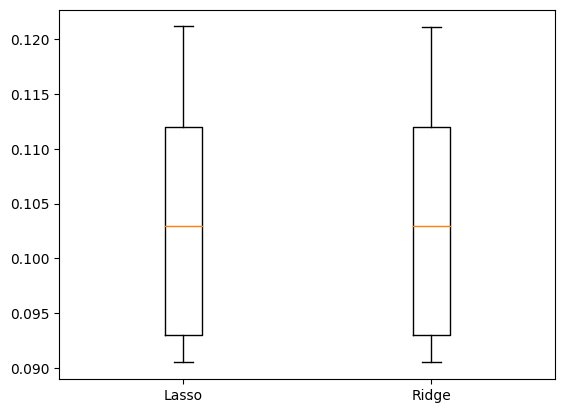

In [261]:
# Then we use RMSE
models = {"Lasso": Lasso(alpha=1e-5), "Ridge": Ridge(alpha=1)}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=10, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring = 'neg_mean_squared_error')
  
  # Append the results
  results.append(np.sqrt(-cv_scores))

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

For the other metric, the same thing happens!

In [262]:
results

[array([0.11455724, 0.10923967, 0.09333766, 0.09287548, 0.0905199 ,
        0.09088354, 0.12114548, 0.10461176, 0.1013792 , 0.11286931]),
 array([0.11445281, 0.10927258, 0.09334244, 0.09291728, 0.09058421,
        0.09087275, 0.12111498, 0.10459319, 0.10137665, 0.11286006])]

In [263]:
# Compare R2 score on the test set
from sklearn.metrics import mean_squared_error
for name, model in models.items():  
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2_test_score = model.score(X_test_scaled, y_test)
    rmse_test_score = mean_squared_error(y_test, y_pred)
    print("{} Test Set R2 score: {}".format(name, r2_test_score))
    print("{} Test Set nmse score: {}".format(name, np.sqrt(rmse_test_score)))

Lasso Test Set R2 score: 0.5888303142898408
Lasso Test Set nmse score: 0.10193290514153214
Ridge Test Set R2 score: 0.5890943950969263
Ridge Test Set nmse score: 0.1019001658025148


Not surprising, the results on the test set are also nearly the same.

## Model Evaluation
Explain what the results of your evaluation tell you. You should:
- Describe which metric you have selected to compare the models and why
- Explain what the outcome of this evaluation tells you about the performance of your models
- Identify, based on the evaluation, which you would consider to be the better performing approach

Two of the most important metrics in regression task are R2 score (measuring how well the model fits the data, the higher, the better) and RMSE (rooted mean square error, measuring the difference between predicted value and the real value, the lower, the better). 

Both R2 scores are about 0.6, that means the features we chose have a moderate to high correlation with attendance rate, while the NMSE score of about 0.1 tells us that our model prediction is quite accurate.

According to the analysis above, we can conclude that both lasso and ridge models performed nearly the same, while ridge model has a slight advantage over the lasso model. Therefore, we will choose the ridge model with alpha equals 1 as our final model.

## ✅ When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review grading rubric. Have you included everything that will be graded?
- Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam